# Quantity Analysis - Time Series

## Objective
Analyze and forecast **quantity trends** over time using time series analysis techniques.

## Dataset Overview
The dataset contains timestamped records of quantities sold or produced.

## Workflow
1. Load the data
2. Explore time-based patterns
3. Resample and smooth
4. Train a forecasting model
5. Visualize predictions

In [5]:
!pip install pandas numpy matplotlib seaborn statsmodels openpyxl

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Load data from Excel file
# Load from Excel (adjust sheet name or column name if needed)
df = pd.read_excel("/content/sample_data/Raw Data_Predictive Analysis.xlsx")


df

,OrderDate,ParentProductIdNew,ParentProductNew,ProductCategoryNew,ArtistNameNew,total_qty_sales,Selling Price,productListViews,productListClicks
0,2019-01-01,11,Product 11,Category 1,TSSOS,3,399.000000,NaN,NaN
1,2019-01-01,114,Product 114,Category 8,TSSA,10,549.000000,NaN,NaN
2,2019-01-01,98,Product 98,Category 8,TSSHT,8,499.000000,NaN,NaN
3,2019-01-01,97,Product 97,Category 8,TSSF,6,549.000000,NaN,NaN
4,2019-01-01,8,Product 8,Category 1,TSSML,6,399.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
40558,2020-12-31,18,Product 18,Category 2,TSSDP,19,570.052632,12004.0,104.0
40559,2020-12-31,76,Product 76,Category 6,TSSML,16,861.500000,2367.0,76.0
40560,2020-12-31,21,Product 21,Category 2,TSSML,5,619.000000,3697.0,60.0
40561,2020-12-31,52,Product 52,Category 4,TSSCC,18,1299.000000,34690.0,553.0


## Exploratory Data Analysis

In [ ]:
# Convert 'Date' column to datetime if not already
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Raw Data_Predictive Analysis (1).xlsx'
df = pd.read_excel(file_path)
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

## Decomposition

In [ ]:
df.set_index('OrderDate',inplace=True)

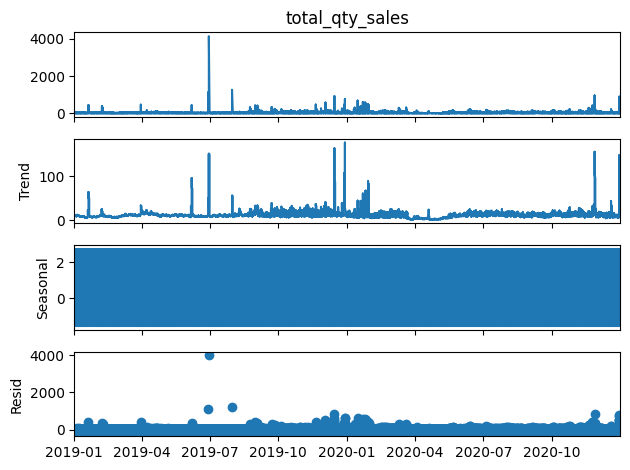

In [ ]:
# Decompose time series
result = seasonal_decompose(df['total_qty_sales'], model='additive', period=30)
result.plot()
plt.tight_layout()
plt.show()

## Modeling with ARIMA

In [ ]:

train_size = int(len(df) * 0.8)
train = df['total_qty_sales'][:train_size]
test = df['total_qty_sales'][train_size:]

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

## Evaluation and Visualization

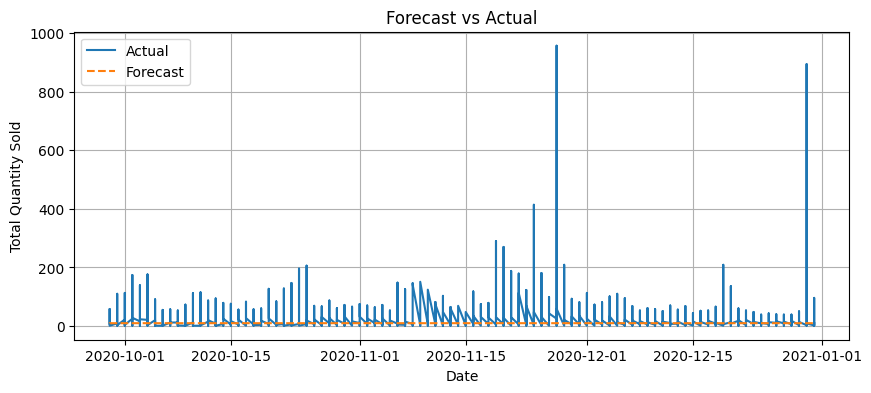

In [ ]:
# Evaluation


# Plot forecast vs actual

plt.figure(figsize=(10,4))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion
- Time series modeling was applied to understand and forecast quantity trends.
- ARIMA provided a simple baseline.
- For improvement, consider SARIMA, Prophet, or LSTM for long-term patterns.